# Suicide Rate Data Analysis & Visualization 

In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Load Dataset
data = pd.read_csv("master.csv")

In [93]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [94]:
data.shape

(27820, 12)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [96]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [97]:
data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [101]:
data.columns = data.columns.str.strip()

In [102]:
#drop columns
data.drop(columns=['country-year', 'HDI for year', 'gdp_for_year ($)', 'generation'], inplace=True)

In [103]:
#First 5 data 
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
0,Albania,1987,male,15-24 years,21,312900,6.71,796
1,Albania,1987,male,35-54 years,16,308000,5.19,796
2,Albania,1987,female,15-24 years,14,289700,4.83,796
3,Albania,1987,male,75+ years,1,21800,4.59,796
4,Albania,1987,male,25-34 years,9,274300,3.28,796


In [3]:
# Rename columns
data.rename(columns={'suicides_no':'suicides', 'gdp_per_capita ($)':'gdp'}, inplace=True)



Total and percent of suicides among male & female in year 1985 - 2016

      sex  suicides  percent
1    male   5188910     77.0
0  female   1559510     23.0


C:\Users\PRATEEK PARASHER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


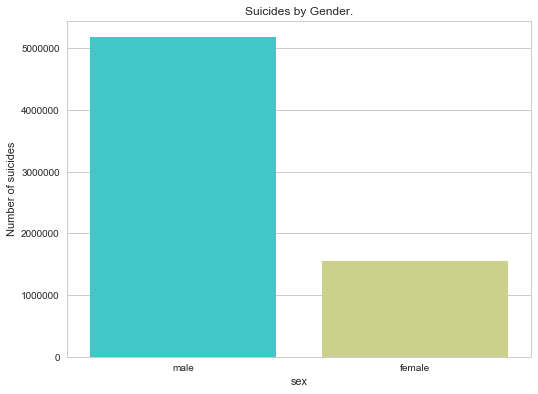

In [105]:
#Total and percent of suicides among male & female in year 1985 - 2016
suicide_sex = data['suicides'].groupby(data['sex']).agg({'suicides' : 'sum'}).assign(percent = lambda x: 100 * x/x.sum())
suicide_sex = np.round(suicide_sex, decimals=0)
suicide_sex = suicide_sex.reset_index().sort_values(by='sex',ascending=False)
most_sex = suicide_sex
print("Total and percent of suicides among male & female in year 1985 - 2016")
print()
print(most_sex)
sns.set(style="whitegrid")
fig = plt.figure(figsize=(8,6))
plt.title('Suicides by Gender.')
sns.set(font_scale=2)
sns.barplot(y='suicides',x='sex',data=most_sex,palette="rainbow");
plt.ylabel('Number of suicides')
plt.tight_layout()

In above visualization we can see that male Suicides are 3x times more than the female Suicides.




C:\Users\PRATEEK PARASHER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


Total and percent of suicides among age groups in year 1985 - 2016

           age  suicides  percent
2  35-54 years   2452141     36.0
4  55-74 years   1658443     25.0
1  25-34 years   1123912     17.0
0  15-24 years    808542     12.0
5    75+ years    653118     10.0
3   5-14 years     52264      1.0


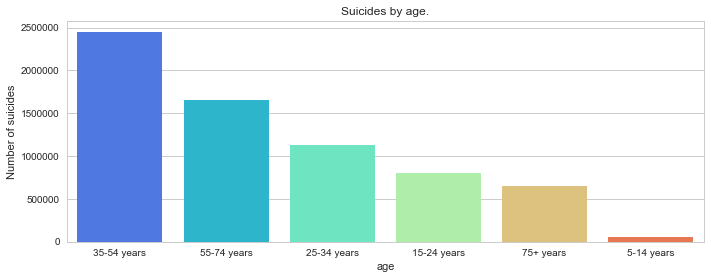

In [128]:
#Total and percent of suicides among age groups in year 1985 - 2016
suicide_age = data['suicides'].groupby(data['age']).agg({'suicides' : 'sum'}).assign(percent = lambda x: 100 * x/x.sum())
suicide_age = np.round(suicide_age, decimals=0)
suicide_age = suicide_age.reset_index().sort_values(by='suicides',ascending=False)
most_age = suicide_age
print("Total and percent of suicides among age groups in year 1985 - 2016")
print()
print(most_age)
sns.set(style="whitegrid")
fig = plt.figure(figsize=(10,4))
plt.title('Suicides by age.')
sns.set(font_scale=0.9)
sns.barplot(y='suicides',x='age',data=most_age,palette="rainbow");
plt.ylabel('Number of suicides')
plt.tight_layout()

In this bar graph we can see that age group 35-54 years with high percentage of 36% suicides 

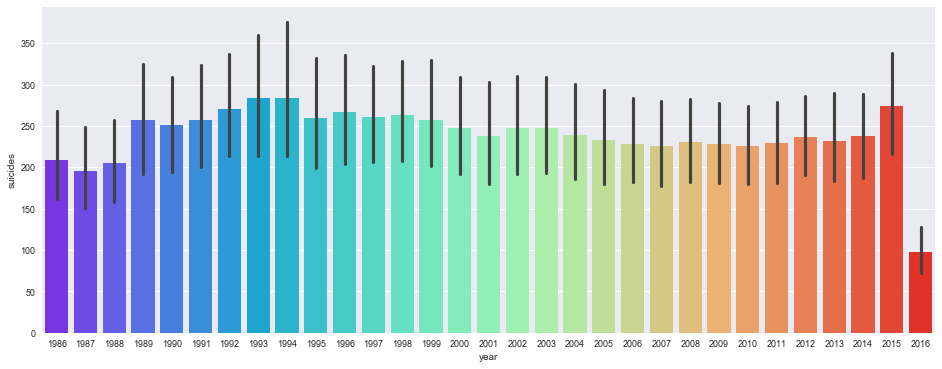

In [129]:
#Suicides each year since 1985
f,ax = plt.subplots(1,1,figsize=(16,6))
ax = sns.barplot(x = data[data.year > 1985]['year'],y = 'suicides',data=data,palette='rainbow')
plt.show()

Suicides each year since 1985

Text(0.5,0,'Suicides')

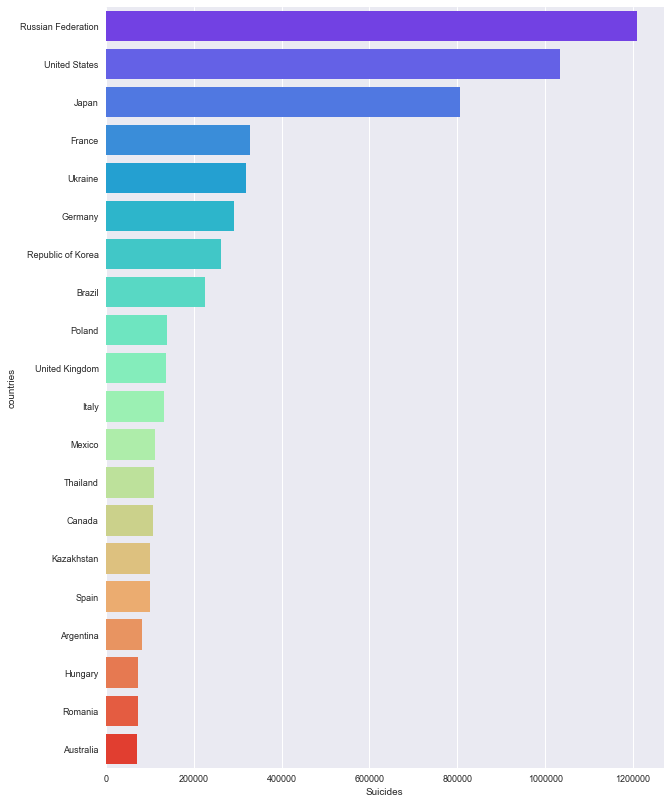

In [126]:
#Top 20 countries with maximum number of suicides since 1985

data_suicide = data['suicides'].groupby(data.country).sum().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(10,14))
ax = sns.barplot(data_suicide.head(20),data_suicide.head(20).index,palette='rainbow')
plt.ylabel('countries')
plt.xlabel('Suicides')

Text(0.5,0,'Suicides')

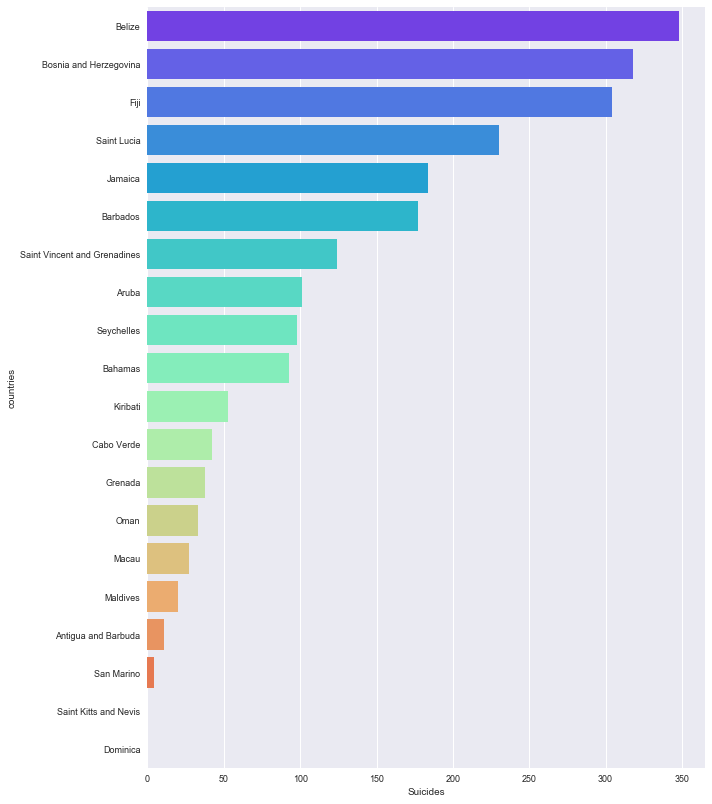

In [127]:
#Top 20 countries with least number of suicides since 1985
data_suicide = data['suicides'].groupby(data.country).sum().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(10,14))
ax = sns.barplot(data_suicide.tail(20),data_suicide.tail(20).index,palette='rainbow')
plt.ylabel('countries')
plt.xlabel('Suicides')